# NLP (Natural Language Processing). Классификация текстовых данных.

### Данные

Источник: https://www.kaggle.com/crowdflower/twitter-airline-sentiment?select=Tweets.csv

##### Данные представляют собой набор твитов о различных авиакомпаниях с разделением на негативные, нейтральные и положительные.

##### Цель: создать алгоритм машинного обучения, который для нового твита будет определять его эмоциональную окраску - позитивный, нейтральный или негативный твит. Такой алгоритм можно будет применять для автоматического чтения твитов и поиска тех, на которые следует обратить внимание службе поддержки клиентов той или иной авиакомпании.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("airline_tweets.csv")

In [3]:
df.head(4)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)


##### Количество негативных, нейтральных и положительных твитов по авиакомпаниям

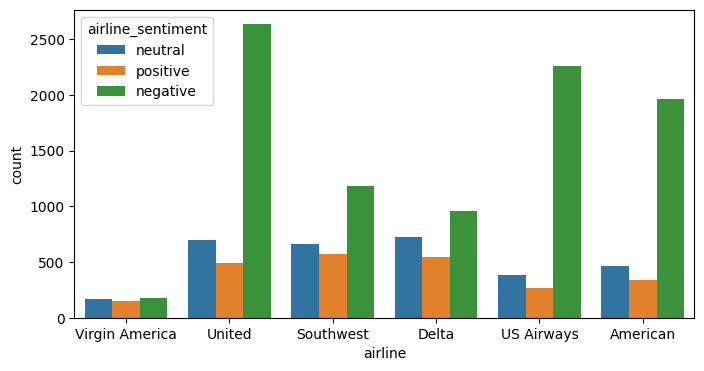

In [4]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='airline', hue='airline_sentiment');

##### Количество негативных твитов в зависимости от причин

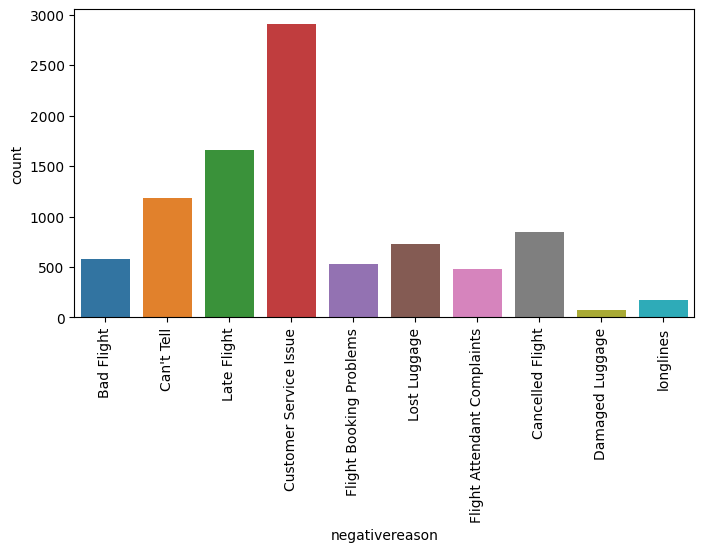

In [5]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df,x='negativereason')
plt.xticks(rotation=90);

##### Общее количество негативных, нейтральных и положительных твитов

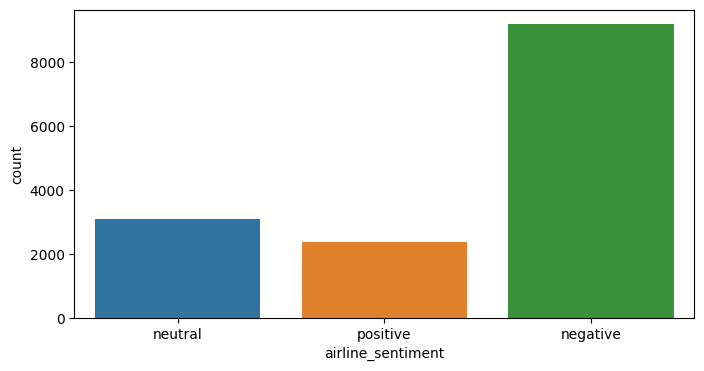

In [6]:
plt.figure(figsize=(8,4))
sns.countplot(data=df,x='airline_sentiment');

In [7]:
df['airline_sentiment'].value_counts()

airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64

## Признаки и целевая переменная

In [8]:
data = df[['airline_sentiment','text']]

In [9]:
data.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


In [10]:
y = df['airline_sentiment']
X = df['text']

### Разбиение на обучающий и тестовый наборы данных - Train Test Split

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

## Векторизация

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [14]:
tfidf = TfidfVectorizer(stop_words='english')

In [15]:
tfidf.fit(X_train)

TfidfVectorizer(stop_words='english')

In [16]:
X_train_tfidf = tfidf.transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [17]:
X_train_tfidf

<11712x12971 sparse matrix of type '<class 'numpy.float64'>'
	with 107073 stored elements in Compressed Sparse Row format>

## Сравнение моделей - Naive Bayes, LogisticRegression, LinearSVC 

In [18]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_tfidf,y_train)

MultinomialNB()

In [19]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(max_iter=1000)
log.fit(X_train_tfidf,y_train)

LogisticRegression(max_iter=1000)

In [20]:
from sklearn.svm import LinearSVC
svc = LinearSVC(dual=False)
svc.fit(X_train_tfidf,y_train)

LinearSVC(dual=False)

## Оценка работы моделей

In [21]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

In [22]:
def report(model):
    preds = model.predict(X_test_tfidf)
    print(classification_report(y_test, preds))
    ConfusionMatrixDisplay.from_estimator(model,X_test_tfidf,y_test)

#### Naive Bayes

              precision    recall  f1-score   support

    negative       0.66      0.99      0.79      1817
     neutral       0.79      0.15      0.26       628
    positive       0.89      0.14      0.24       483

    accuracy                           0.67      2928
   macro avg       0.78      0.43      0.43      2928
weighted avg       0.73      0.67      0.59      2928



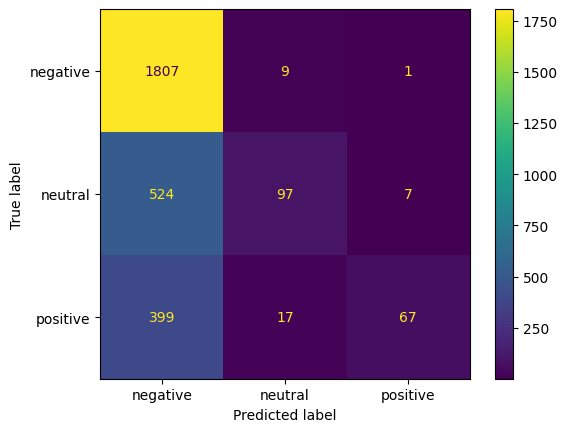

In [23]:
report(nb)

#### LogisticRegression

              precision    recall  f1-score   support

    negative       0.80      0.93      0.86      1817
     neutral       0.63      0.47      0.54       628
    positive       0.82      0.58      0.68       483

    accuracy                           0.77      2928
   macro avg       0.75      0.66      0.69      2928
weighted avg       0.77      0.77      0.76      2928



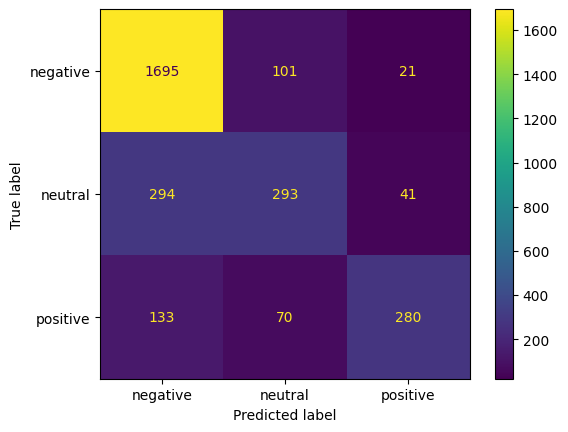

In [24]:
report(log)

#### LinearSVC 

              precision    recall  f1-score   support

    negative       0.82      0.89      0.86      1817
     neutral       0.59      0.52      0.55       628
    positive       0.76      0.64      0.69       483

    accuracy                           0.77      2928
   macro avg       0.73      0.68      0.70      2928
weighted avg       0.76      0.77      0.77      2928



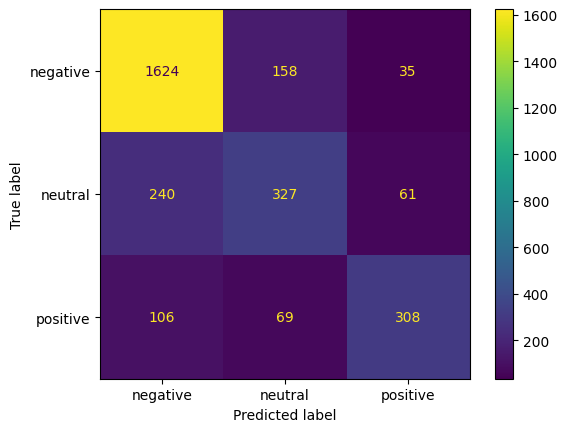

In [25]:
report(svc)

### Вывод по моделям:

#### Наивный Баесовский классификатор 
* хуже всех справился с задачей;
* хорошо работает на негативных твитах, но часто ошибается на классах позитивных и нейтральных. 

#### Логистическая регрессия и метод опорных векторов

* в целом справились неплохо, хорошо разбивают данные на три класса;
* результаты похожи.

## Создание пайплайна для применения к новым твитам

Остановимся на модели логистической регрессии. Создадим пайплайн, который можно будет применять напрямую к входным текстовым данным (твитам).

In [26]:
from sklearn.pipeline import Pipeline

In [27]:
pipe = Pipeline([('tfidf',TfidfVectorizer()),('LogisticRegression',LogisticRegression(max_iter=1000))])

In [28]:
pipe.fit(df['text'],df['airline_sentiment'])

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('LogisticRegression', LogisticRegression(max_iter=1000))])

In [29]:
new_tweet = ['good flight']
pipe.predict(new_tweet)

array(['positive'], dtype=object)

In [30]:
new_tweet = ['bad flight']
pipe.predict(new_tweet)

array(['negative'], dtype=object)

In [31]:
new_tweet = ['ok flight']
pipe.predict(new_tweet)

array(['neutral'], dtype=object)